# **Tame Your Python**

Let's see some DTs in action

`Leggo`

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# Visualising the results
def plot_model(classifier, X_set, y_set, text):
  from matplotlib.colors import ListedColormap
  X_set, y_set = X_train, y_train
  X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1))
  plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('pink', 'cyan')))
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
  plt.title(text)
  plt.xlabel('X')
  plt.ylabel('y')
  plt.legend()
  plt.show()

## Make weird datasets to throw our models off

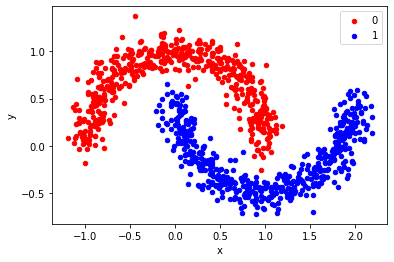

In [84]:
from sklearn.datasets.samples_generator import make_moons
# generate 2d classification dataset
X, y = make_moons(n_samples=1000, noise=0.1)
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

datadict = {'X1': X[:,0],'X2' : X[:,1], 'target': y}
data = pd.DataFrame(data=datadict)
X = data.iloc[:, [0,1]].values
y = data.iloc[:, 2].values

In [0]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


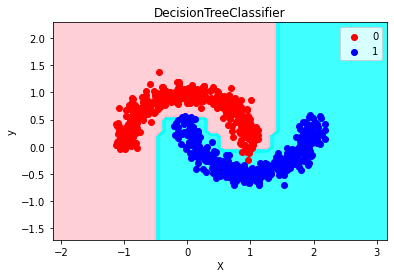

In [86]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(min_samples_leaf=1, min_samples_split=2)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
plot_model(classifier, X_train, y_train, "DecisionTreeClassifier")

In [87]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.985

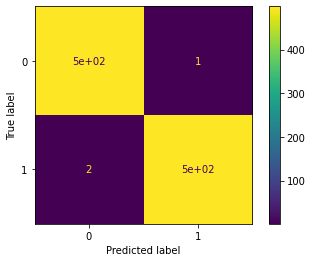

In [88]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X, y)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


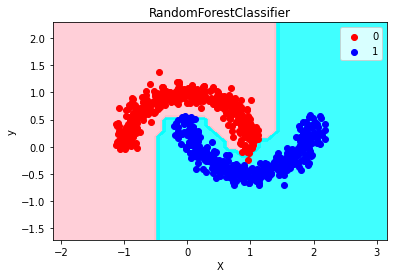

In [89]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
plot_model(classifier, X_train, y_train, "RandomForestClassifier")

In [90]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.99

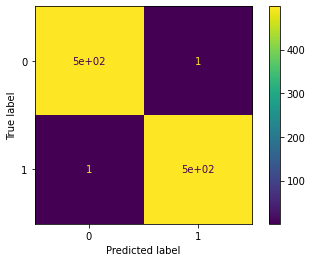

In [91]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X, y)